In [1]:
import numpy as np

X = [[13,8,6],[9,7,4],[7,4,0],[15,6,3]]
X = np.array(X)
X = X.T
X

array([[13,  9,  7, 15],
       [ 8,  7,  4,  6],
       [ 6,  4,  0,  3]])

In [2]:
#proyeccion en d- dimensiones
U, s, Vt = np.linalg.svd(X) # Singular Value Decomposition
U

array([[ 0.84314868,  0.48260084,  0.2370585 ],
       [ 0.46769   , -0.44075136, -0.76616206],
       [ 0.2652666 , -0.75685842,  0.59732651]])

In [3]:
s

array([27.05756128,  3.78893084,  1.87946287])

In [4]:
Vt

array([[ 0.60219959,  0.44066183,  0.28726908,  0.60054082],
       [-0.47331305, -0.4669617 ,  0.42629452,  0.61334697],
       [ 0.28541296, -0.44709683, -0.74768104,  0.39952087],
       [-0.57608146,  0.62279077, -0.42038377,  0.32177523]])

In [5]:
c1 = Vt.T[:, 0] # unit vector that defines all the ppal components 
c2 = Vt.T[:, 1]
c1

array([0.60219959, 0.44066183, 0.28726908, 0.60054082])

In [6]:
W2 = Vt.T[:, :2]
X2D = X.dot(W2)
X2D# 

array([[22.81354704,  1.82854122],
       [12.65455081, -1.66997641],
       [ 7.17746735, -2.86768421]])

In [7]:
#PCA using scikitlearn
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [8]:
X2D

array([[ 9.01546074, -0.52632994],
       [-1.69775065,  1.52966171],
       [-7.31771009, -1.00333177]])

In [9]:
pca.explained_variance_ratio_ # el primer componente explica el 97% de la varianca

array([0.97436158, 0.02563842])

In [10]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [11]:
# como regla se busca reducir la dimensionalidad tal que se conserve el 95% de la varianza
pca = PCA()
pca.fit(y.reshape(-1,1))
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1


In [12]:
from sklearn.datasets import load_diabetes
import pandas as pd
boston = load_diabetes()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

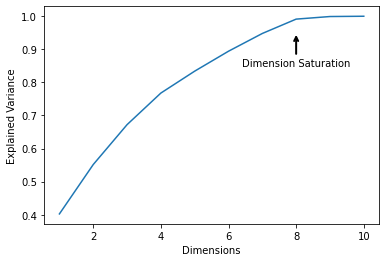

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, exp_var_cumul.shape[0] + 1), exp_var_cumul)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.annotate('Dimension Saturation', xy=(8, 0.95), xytext=(8, 0.85),horizontalalignment="center", arrowprops=dict(arrowstyle='->',lw=2))
plt.show()

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


In [15]:
df = pd.DataFrame(mnist.data, columns=mnist.feature_names)
pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

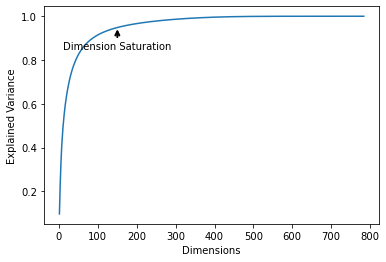

In [16]:
plt.plot(range(1, exp_var_cumul.shape[0] + 1), exp_var_cumul)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.annotate('Dimension Saturation', xy=(150, 0.95), xytext=(150, 0.85),horizontalalignment="center", arrowprops=dict(arrowstyle='->',lw=2))
plt.show() # las explained variance 

In [17]:
X, y = mnist['data'], mnist['target']
# split the array
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000]

In [18]:
pca = PCA(n_components=154) # reducir 800 dimensiones a 154
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

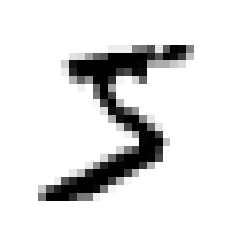

In [19]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28) # las imagenes son 28x28 
some_comnpresed_digit = X_recovered[0]
some_comnpresed_image = some_comnpresed_digit.reshape(28,28)


plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

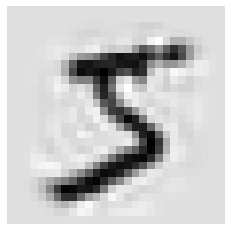

In [20]:
plt.imshow(some_comnpresed_image, cmap="binary")
plt.axis("off")
plt.show()

In [21]:
# Incremental PCA- feed the algorithm with minibatch, useful to catch data on the fly
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [22]:
from matplotlib.image import imread # or `from imageio import imread`
import os

image = imread(os.path.join("ladybug.jpg"))
image.shape

(1280, 1920, 3)

In [25]:
from sklearn.cluster import KMeans

X = image.reshape(-1, 3) 
kmeans = KMeans(n_clusters=8).fit(X) 
segmented_img = kmeans.cluster_centers_[kmeans.labels_] 
segmented_img = segmented_img.reshape(image.shape)
segmented_img

array([[[ 5.03795563, 27.03717597,  0.88755784],
        [ 5.03795563, 27.03717597,  0.88755784],
        [ 5.03795563, 27.03717597,  0.88755784],
        ...,
        [52.29010711, 95.2398828 , 12.69641546],
        [52.29010711, 95.2398828 , 12.69641546],
        [52.29010711, 95.2398828 , 12.69641546]],

       [[ 5.03795563, 27.03717597,  0.88755784],
        [ 5.03795563, 27.03717597,  0.88755784],
        [ 5.03795563, 27.03717597,  0.88755784],
        ...,
        [52.29010711, 95.2398828 , 12.69641546],
        [52.29010711, 95.2398828 , 12.69641546],
        [52.29010711, 95.2398828 , 12.69641546]],

       [[ 5.03795563, 27.03717597,  0.88755784],
        [ 5.03795563, 27.03717597,  0.88755784],
        [ 5.03795563, 27.03717597,  0.88755784],
        ...,
        [52.29010711, 95.2398828 , 12.69641546],
        [52.29010711, 95.2398828 , 12.69641546],
        [52.29010711, 95.2398828 , 12.69641546]],

       ...,

       [[ 5.03795563, 27.03717597,  0.88755784],
        [ 5

In [26]:
type(segmented_img)

numpy.ndarray

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')
for idx, n_clusters in enumerate(n_colors):
   plt.subplot(232 + idx)
   plt.imshow(segmented_imgs[idx])
   plt.title("{} colors".format(n_clusters))
   plt.axis('off')
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 
